In [91]:
import numpy as np
import pandas as pd

In [93]:
#'index_col= 0' Makes sure the content of the first column of the csv will be used as index
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0);
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0);
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0);
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0);

In [95]:
loan_data_inputs_train.head();

In [97]:
loan_data_targets_train.head();

In [99]:
loan_data_inputs_train.shape

(373028, 326)

In [101]:
loan_data_targets_train.shape

(373028, 1)

In [103]:
loan_data_inputs_test.shape

(93257, 326)

In [105]:
loan_data_targets_test.shape

(93257, 1)

In [111]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_NV_FL_HI_AL',
'addr_state:NM_VA_OK_TN',
'addr_state:LA_NC',
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',                                                            
'addr_state:MO_MD_UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR_WI',
'addr_state:IL_CT_MT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID_IA',                                                            
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b___mov__house',
'purpose:oth__educ_ren_en__med',
'purpose:wedd__vacation',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',                                                            
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',                                                            
'mths_since_issue_d:<38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-86',
'mths_since_issue_d:>86',
'int_rate: <9.548',
'int_rate: 9.548- 12.025',
'int_rate: 12.025- 15.74',
'int_rate: 15.74- 20.281',
'int_rate: > 20.281',
'mths_since_earliest_cr_line: < 140',
'mths_since_earliest_cr_line: 141-164',
'mths_since_earliest_cr_line: 165-247',
'mths_since_earliest_cr_line: 248-270',
'mths_since_earliest_cr_line: 271-352',
'mths_since_earliest_cr_line: > 352',
'delinq_2yrs: =0',
'delinq_2yrs: 1-3',
'delinq_2yrs: >= 4',
'inq_last_6mths: =0',
'inq_last_6mths: 1-2',
'inq_last_6mths: 3-6',
'inq_last_6mths: > 6',
'open_acc: =0',
'open_acc: =1',
'open_acc: 2-3',
'open_acc: 4-12',
'open_acc: 13-17',
'open_acc: 18-23',
'open_acc: 24-25',
'open_acc: 26-29',
'open_acc: >= 30',                                                            
'pub_rec: 0-2',
'pub_rec: 3-4',
'pub_rec: >= 5',
'total_acc: <= 27',
'total_acc: 28-51',
'total_acc: >= 52',
'acc_now_delinq:0-1',
'acc_now_delinq:>= 2',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]];

In [113]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_b___mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'mths_since_issue_d:>86',
'int_rate: > 20.281',
'mths_since_earliest_cr_line: < 140',
'delinq_2yrs: >= 4',
'inq_last_6mths: > 6',
'open_acc: =0',
'pub_rec: 0-2',
'total_acc: <= 27',
'acc_now_delinq:0-1',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2'];

In [115]:
inputs_train= inputs_train_with_ref_cat.drop(ref_categories, axis=1);

In [117]:
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head();

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [121]:
reg = LogisticRegression();
# We create an instance of an object from the 'LogisticRegression' class.

In [123]:
#Since we'll have a lot of outputs, I want to make sure all the rows will be printed.
pd.options.display.max_rows= None
# Sets the pandas dataframe options to display all columns/ rows.

In [125]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.
reg.fit(inputs_train, loan_data_targets_train);

C:\Users\fatem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([0.31403304])

In [127]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 0.77406374,  0.52899993,  0.34976976,  0.19582245,  0.10472805,
        -0.04515325,  0.08039267,  0.11123483,  0.03376449,  0.0854721 ,
         0.06012909,  0.06453077,  0.23031957,  0.07552032,  0.13887438,
         0.10149975,  0.19969734,  0.27097996,  0.32350426,  0.58176493,
         0.09872228, -0.00876624,  0.31096066,  0.58364039,  0.35979963,
         0.40904129,  0.29998629,  0.06239515,  0.07635148,  0.0952302 ,
         0.12368065,  0.09180222,  0.06545609,  0.12941492,  0.74404817,
         0.53623427,  0.43804449,  0.25930247,  0.11458816, -0.13383686,
        -0.36593423,  1.04899585,  0.72572579,  0.46913122,  0.23249121,
         0.0376369 ,  0.01730559,  0.06028522,  0.10436888,  0.10396246,
         0.02546622, -0.03101467,  0.09944207, -0.04025456, -0.12049533,
         0.07150719,  0.14001816,  0.05551731,  0.03339153,  0.02486483,
        -0.03763477,  0.06428163, -0.02911022,  0.09344628,  0.04877195,
        -0.02325482,  0.01882676,  0.02771235,  0.0

In [131]:
feature_name= inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [133]:
summary_table= pd.DataFrame(columns= ['feature_name'], data= feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.

In [135]:
summary_table['Coefficients']= np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.

In [137]:
summary_table.index= summary_table.index+1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0]= ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table= summary_table.sort_index()
# Sorts the dataframe by index.
summary_table;

In [139]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [141]:
#print(inputs_train.dtypes)

In [143]:
inputs_train = inputs_train.astype(float);

In [145]:
reg= LogisticRegression_with_p_values();
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [147]:
reg.fit(inputs_train, loan_data_targets_train);
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\fatem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table;

In [151]:
p_values= reg.p_values;
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [153]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values));
# We add the value 'NaN' in the beginning of the variable with p-values.

In [155]:
summary_table['p_values']= p_values;
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [157]:
summary_table;

In [159]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_NV_FL_HI_AL',
'addr_state:NM_VA_OK_TN',
'addr_state:LA_NC',
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',                                                            
'addr_state:MO_MD_UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR_WI',
'addr_state:IL_CT_MT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID_IA',                                                            
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b___mov__house',
'purpose:oth__educ_ren_en__med',
'purpose:wedd__vacation',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',                                                            
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',                                                            
'mths_since_issue_d:<38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-86',
'mths_since_issue_d:>86',
'int_rate: <9.548',
'int_rate: 9.548- 12.025',
'int_rate: 12.025- 15.74',
'int_rate: 15.74- 20.281',
'int_rate: > 20.281',
'mths_since_earliest_cr_line: < 140',
'mths_since_earliest_cr_line: 141-164',
'mths_since_earliest_cr_line: 165-247',
'mths_since_earliest_cr_line: 248-270',
'mths_since_earliest_cr_line: 271-352',
'mths_since_earliest_cr_line: > 352',
'inq_last_6mths: =0',
'inq_last_6mths: 1-2',
'inq_last_6mths: 3-6',
'inq_last_6mths: > 6',
'acc_now_delinq:0-1',
'acc_now_delinq:>= 2',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35'
]];

In [161]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_b___mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'mths_since_issue_d:>86',
'int_rate: > 20.281',
'mths_since_earliest_cr_line: < 140',
'inq_last_6mths: > 6',
'acc_now_delinq:0-1',
'annual_inc:<20K',
'dti:>35'];

In [163]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1);
inputs_train.head();

In [165]:
inputs_train = inputs_train.astype(float);

In [167]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values();
reg2.fit(inputs_train, loan_data_targets_train);

C:\Users\fatem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
feature_name = inputs_train.columns.values;

In [171]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table;

In [173]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table;
# Here we get the results for our final PD model.

In [175]:
import pickle

In [177]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

In [179]:
inputs_test_with_ref_cat= loan_data_inputs_test.loc[: ,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_NV_FL_HI_AL',
'addr_state:NM_VA_OK_TN',
'addr_state:LA_NC',
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',                                                            
'addr_state:MO_MD_UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR_WI',
'addr_state:IL_CT_MT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID_IA',                                                            
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b___mov__house',
'purpose:oth__educ_ren_en__med',
'purpose:wedd__vacation',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',                                                            
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',                                                            
'mths_since_issue_d:<38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-86',
'mths_since_issue_d:>86',
'int_rate: <9.548',
'int_rate: 9.548- 12.025',
'int_rate: 12.025- 15.74',
'int_rate: 15.74- 20.281',
'int_rate: > 20.281',
'mths_since_earliest_cr_line: < 140',
'mths_since_earliest_cr_line: 141-164',
'mths_since_earliest_cr_line: 165-247',
'mths_since_earliest_cr_line: 248-270',
'mths_since_earliest_cr_line: 271-352',
'mths_since_earliest_cr_line: > 352',
'inq_last_6mths: =0',
'inq_last_6mths: 1-2',
'inq_last_6mths: 3-6',
'inq_last_6mths: > 6',
'acc_now_delinq:0-1',
'acc_now_delinq:>= 2',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35'
]];

In [181]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_b___mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'mths_since_issue_d:>86',
'int_rate: > 20.281',
'mths_since_earliest_cr_line: < 140',
'inq_last_6mths: > 6',
'acc_now_delinq:0-1',
'annual_inc:<20K',
'dti:>35'];

In [183]:
inputs_test= inputs_test_with_ref_cat.drop(ref_categories, axis=1)
inputs_test.head();

In [185]:
y_hat_test= reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [187]:
y_hat_test_proba= reg2.model.predict_proba(inputs_test);
y_hat_test_proba;

In [189]:
y_hat_test_proba[: ][:, 1];

In [191]:
y_hat_test_proba= y_hat_test_proba[: ][:, 1];
y_hat_test_proba;

In [193]:
loan_data_targets_test_temp = loan_data_targets_test;

In [195]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True);
# We reset the index of a dataframe.

In [197]:
df_actual_predicted_probs= pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis= 1);

In [199]:
df_actual_predicted_probs.shape;

In [201]:
df_actual_predicted_probs.columns= ['loan_data_targets_test', 'y_hat_test_proba'];

In [203]:
df_actual_predicted_probs.index= loan_data_inputs_test.index;
# Makes the index of one dataframe equal to the index of another dataframe.

In [205]:
df_actual_predicted_probs.head();

In [207]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test']= np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0);

In [209]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']);
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

In [211]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0];
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

In [213]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1];
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

In [215]:
from sklearn.metrics import roc_curve, roc_auc_score

In [217]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test']);
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

In [219]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba']);
# Here we store each of the three arrays in a separate variable. 

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

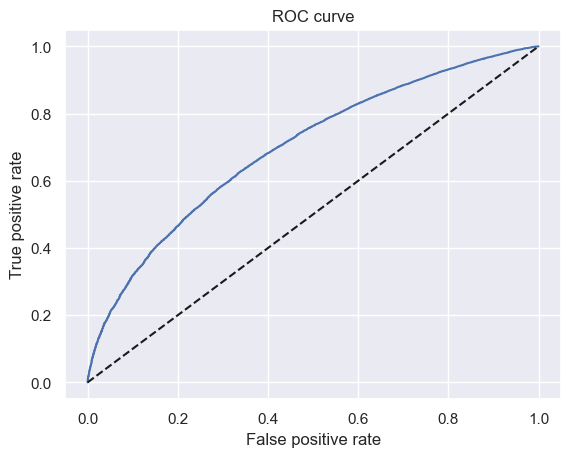

In [222]:
plt.plot(fpr, tpr);
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k');
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate');
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate');
# We name the x-axis "True positive rate".
plt.title('ROC curve');
# We name the graph "ROC curve".

In [225]:
AUROC= roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6979383949665805

In [227]:
df_actual_predicted_probs= df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [229]:
df_actual_predicted_probs.head();

In [231]:
df_actual_predicted_probs.tail();

In [233]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index();
# We reset the index of a dataframe and overwrite it.

In [235]:
df_actual_predicted_probs.head();

In [237]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1;
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum();
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum();
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [239]:
df_actual_predicted_probs.head();

In [241]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0]);
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum();
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum());
# We calculate the cumulative percentage of 'bad'.

In [243]:
df_actual_predicted_probs.head();

In [245]:
df_actual_predicted_probs.tail();

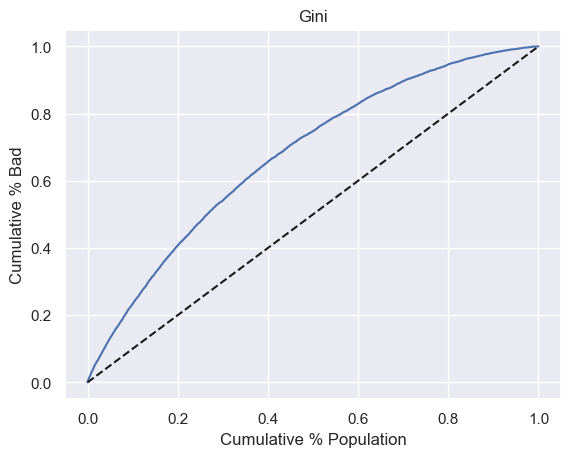

In [247]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k');
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population');
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad');
# We name the y-axis "Cumulative % Bad".
plt.title('Gini');
# We name the graph "Gini".

In [249]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.395876789933161

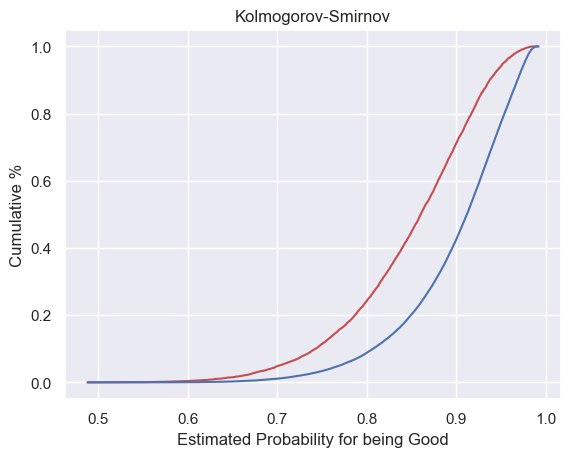

In [251]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r');
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b');
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good');
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %');
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov');
# We name the graph "Kolmogorov-Smirnov".

In [253]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good']);
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.2888798333426335

In [255]:
pd.options.display.max_columns= None;

In [257]:
inputs_test_with_ref_cat.head();

In [259]:
summary_table;

In [261]:
y_hat_test_proba;

In [263]:
summary_table;

In [265]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:sm_b___mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length_int:0',
 'mths_since_issue_d:>86',
 'int_rate: > 20.281',
 'mths_since_earliest_cr_line: < 140',
 'inq_last_6mths: > 6',
 'acc_now_delinq:0-1',
 'annual_inc:<20K',
 'dti:>35']

In [267]:
df_ref_categories= pd.DataFrame(ref_categories, columns= ['Feature name']);
df_ref_categories['Coefficients']= 0;
df_ref_categories['p_values']= np.nan;
df_ref_categories;

In [269]:
df_scorecard = pd.concat([summary_table, df_ref_categories]);
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index();
# We reset the index of a dataframe.
df_scorecard;

In [271]:
df_scorecard['Original feature name']= df_scorecard['Feature name'].str.split(':').str[0];
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard;

In [273]:
min_score = 300;
max_score = 850;

In [275]:
df_scorecard.groupby('Original feature name')['Coefficients'].min();
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

In [277]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum();
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef;

In [279]:
df_scorecard.groupby('Original feature name')['Coefficients'].max();
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

In [281]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum();
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef;

In [283]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef);
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard;

In [285]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score;
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard;

C:\Users\fatem\AppData\Local\Temp\ipykernel_18868\2108814994.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (m

In [287]:
df_scorecard['Score - Preliminary']= df_scorecard['Score - Calculation'].round();
df_scorecard;

In [289]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum();
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel;

In [291]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum();
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel;

In [293]:
# One has to be added to the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [311]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation'];
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,0.333259,NaN,Intercept,383.337030,383.0,-0.337030,383.0
1,1,grade:A,0.762682,3.799520e-17,grade,70.534014,71.0,0.465986,71.0
2,2,grade:B,0.518638,2.522503e-17,grade,47.964409,48.0,0.035591,48.0
3,3,grade:C,0.344070,1.297839e-09,grade,31.820164,32.0,0.179836,32.0
4,4,grade:D,0.188629,4.353329e-04,grade,17.444684,17.0,-0.444684,17.0
5,5,grade:E,0.096803,3.944642e-02,grade,8.952447,9.0,0.047553,9.0
6,6,grade:F,-0.065726,1.789959e-01,grade,-6.078417,-6.0,0.078417,-6.0
7,7,home_ownership:OWN,0.083309,3.671561e-05,home_ownership,7.704555,8.0,0.295445,8.0
8,8,home_ownership:MORTGAGE,0.112954,5.350183e-19,home_ownership,10.446137,10.0,-0.446137,10.0
9,9,addr_state:NM_VA_OK_TN,0.025434,3.493989e-01,addr_state,2.352160,2.0,-0.352160,2.0


In [335]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary'];
df_scorecard['Score - Final'][4] = 18;
df_scorecard['Score - Final'][8] = 11;
df_scorecard['Score - Final'][28] = 6;
df_scorecard

C:\Users\fatem\AppData\Local\Temp\ipykernel_18868\3285829441.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Final'][4] = 18;
C:\Users\fatem\AppData\Local\Temp\ipykernel_18868\3285829441.py:2: SettingWithCopyWarning

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,0.333259,NaN,Intercept,383.337030,383.0,-0.337030,383.0
1,1,grade:A,0.762682,3.799520e-17,grade,70.534014,71.0,0.465986,71.0
2,2,grade:B,0.518638,2.522503e-17,grade,47.964409,48.0,0.035591,48.0
3,3,grade:C,0.344070,1.297839e-09,grade,31.820164,32.0,0.179836,32.0
4,4,grade:D,0.188629,4.353329e-04,grade,17.444684,17.0,-0.444684,18.0
5,5,grade:E,0.096803,3.944642e-02,grade,8.952447,9.0,0.047553,9.0
6,6,grade:F,-0.065726,1.789959e-01,grade,-6.078417,-6.0,0.078417,-6.0
7,7,home_ownership:OWN,0.083309,3.671561e-05,home_ownership,7.704555,8.0,0.295445,8.0
8,8,home_ownership:MORTGAGE,0.112954,5.350183e-19,home_ownership,10.446137,10.0,-0.446137,11.0
9,9,addr_state:NM_VA_OK_TN,0.025434,3.493989e-01,addr_state,2.352160,2.0,-0.352160,2.0


In [337]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum();
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [339]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum();
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [341]:
inputs_test_with_ref_cat.head();

In [343]:
df_scorecard;

In [349]:
inputs_test_with_ref_cat_w_intercept= inputs_test_with_ref_cat;

In [351]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1);
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

ValueError: cannot insert Intercept, already exists

In [353]:
inputs_test_with_ref_cat_w_intercept.head();

In [355]:
inputs_test_with_ref_cat_w_intercept= inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values];

In [357]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA_OK_TN,addr_state:LA_NC,addr_state:NY,addr_state:CA,addr_state:TX,addr_state:MO_MD_UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR_WI,addr_state:IL_CT_MT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID_IA,verification_status:Not Verified,verification_status:Source Verified,purpose:oth__educ_ren_en__med,purpose:wedd__vacation,purpose:major_purch__car__home_impr,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-86,int_rate: <9.548,int_rate: 9.548- 12.025,int_rate: 12.025- 15.74,int_rate: 15.74- 20.281,mths_since_earliest_cr_line: 141-164,mths_since_earliest_cr_line: 165-247,mths_since_earliest_cr_line: 248-270,mths_since_earliest_cr_line: 271-352,mths_since_earliest_cr_line: > 352,inq_last_6mths: =0,inq_last_6mths: 1-2,inq_last_6mths: 3-6,acc_now_delinq:>= 2,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_NV_FL_HI_AL,verification_status:Verified,purpose:sm_b___mov__house,initial_list_status:f,term:60,emp_length_int:0,mths_since_issue_d:>86,int_rate: > 20.281,mths_since_earliest_cr_line: < 140,inq_last_6mths: > 6,acc_now_delinq:0-1,annual_inc:<20K,dti:>35
362514,1,False,False,True,False,False,False,False,True,0,0,False,True,False,0,0,0,0,0,0,0,False,False,0,0,1,False,False,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False,0,0,True,0,True,1,1,0,0,0,0,1,0,0
288564,1,False,False,False,False,True,False,False,True,0,0,False,False,False,0,0,1,0,0,0,0,False,False,0,0,0,True,False,True,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,0,0,True,0,False,1,0,0,1,0,0,1,0,0
213591,1,False,False,True,False,False,False,False,True,0,0,False,False,False,1,0,0,0,0,0,0,False,False,0,0,0,False,True,False,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,0,0,True,0,True,0,0,0,0,0,0,1,0,0
263083,1,False,False,True,False,False,False,False,True,0,0,False,False,False,0,1,0,0,0,0,0,False,True,0,0,0,False,True,True,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False,0,0,False,0,False,1,0,0,0,1,0,1,0,0
165001,1,True,False,False,False,False,False,False,True,0,0,False,False,False,0,1,0,0,0,0,0,False,False,0,0,0,False,True,False,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,False,0,0,True,0,True,0,0,0,0,0,0,1,0,0


In [359]:
scorecard_scores= df_scorecard['Score - Final'];

In [361]:
scorecard_scores.shape;

In [363]:
inputs_test_with_ref_cat_w_intercept.shape;

In [365]:
scorecard_scores= scorecard_scores.values.reshape(90, 1);

In [367]:
scorecard_scores.shape;

In [369]:
y_scores= inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores);
y_scores.head();

In [370]:
y_scores.tail();

In [373]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef;
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.
sum_coef_from_score.head();

In [375]:
sum_coef_from_score = sum_coef_from_score.astype(float);

In [377]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1);
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head();

In [379]:
y_hat_test_proba[0: 5];

In [381]:
df_actual_predicted_probs['y_hat_test_proba'].head();

In [383]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [385]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7152,2890
1,35452,47763


In [387]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.076691,0.030990
1,0.380154,0.512165


In [389]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5888566005769004

In [391]:
from sklearn.metrics import roc_curve, roc_auc_score

In [393]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980084, 0.99980084,
        1.        ]),
 array([0.00000000e+00, 1.20170642e-05, 2.04290092e-04, ...,
        9.99987983e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99174041, 0.98991783, ..., 0.52282647, 0.50625485,
        0.48807624]))

In [395]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

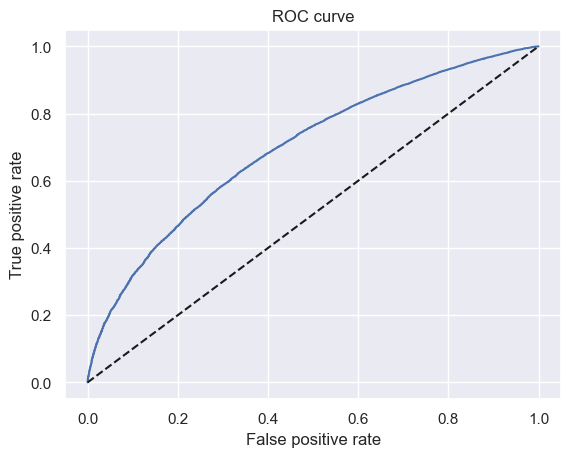

In [399]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [401]:
thresholds

array([       inf, 0.99174041, 0.98991783, ..., 0.52282647, 0.50625485,
       0.48807624])

In [403]:
thresholds.shape

(17362,)

In [405]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1);
# We concatenate 3 dataframes along the columns.

In [407]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr'];
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [409]:
df_cutoffs= pd.DataFrame(df_cutoffs);

In [411]:
df_cutoffs.head();

In [413]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16);
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

C:\Users\fatem\AppData\Local\Temp\ipykernel_18868\3812754854.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16);


In [415]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round();
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [417]:
df_cutoffs.head();

In [419]:
df_cutoffs['Score'][0] = max_score;

C:\Users\fatem\AppData\Local\Temp\ipykernel_18868\1295313107.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['Score'][0] = max_score;


In [421]:
df_cutoffs.head();

In [423]:
df_cutoffs.tail();

In [425]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [427]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [428]:
df_cutoffs.head();

In [429]:
df_cutoffs.tail();

In [430]:
df_actual_predicted_probs['y_hat_test_proba'];

In [431]:
df_cutoffs;

In [432]:
df_cutoffs.iloc[5500: 6500, ];
# Here we display the dataframe with cutoffs form line with index 5500 to line with index 6500.

In [433]:
df_cutoffs.iloc[1200: 2000, ];
# Here we display the dataframe with cutoffs form line with index 1200 to line with index 2000.

In [441]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [443]:
df_scorecard.to_csv('df_scorecard.csv')

In [445]:
df_cutoffs.iloc[: 3000, ];